In [1]:
from pymongo import MongoClient
from shapely.geometry import mapping, shape
import geopandas as gpd

Read data from the existing geojson files

In [2]:
data = gpd.read_file('search_ctx.geojson')
data.head()

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -..."


Renames id column to comply with MongoDB Rules

In [3]:
data = data.rename(columns={'id':'_id'})
data.head()

,_id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -..."


Maps geometry data to JSON objects

In [4]:
data['geometry'] = data['geometry'].apply(lambda x:mapping(x))
data['geometry']

/home/canyetismis/mongo_test/lib/python3.8/site-packages/geopandas-0.10.2-py3.8.egg/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


0    {'type': 'Polygon', 'coordinates': (((0.18, 0....
Name: geometry, dtype: object

initiates a new DB connection

In [5]:
client = MongoClient()
db = client["mongo_test"]
collection = db["geodata"]

Converts data to a dictionary and inserts records to the DB

In [6]:
data = data.to_dict(orient='records')
collection.insert_many(data)

Runs a query within the database

In [7]:
coordinates = collection.find({})
coordinates

Extracts the polygon from query

In [8]:
for x in coordinates:
    poly = x['geometry']
poly

{'type': 'Polygon',
 'coordinates': [[[0.18, 0.4052],
   [0.27, -0.3064],
   [-0.18, -0.3657],
   [-0.26, 0.3558],
   [0.18, 0.4052]]]}

Reshapes the polygon

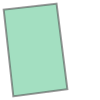

In [9]:
shape(poly)